In [1]:
# import depends
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
# set csv paths 
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

In [3]:
# read city data 
city_pd = pd.read_csv(city_data, low_memory=False)

In [4]:
# rename and format columns in city data
city_data_form = city_pd.rename(columns={"city":"City", "driver_count": "Driver Count", 
                                                   "type":"Type"})
city_data_form.head()

,City,Driver Count,Type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
# read ride data
ride_pd = pd.read_csv(ride_data, low_memory=False)

In [6]:
# rename and format columns in city data
ride_data_form = ride_pd.rename(columns={"city":"City", "date": "Date", 
                                         "fare":"Fare", "ride_id": "Ride ID"})
ride_data_form.head()

,City,Date,Fare,Ride ID
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
pyber = pd.merge(city_data_form, ride_data_form, on="City")
pyber.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [8]:
# Average Fare ($) Per City
avg_fare_per_city = pyber.groupby(["City"]).mean()["Fare"]

In [9]:
# Total Number of Rides Per City
total_rides_per_city = pyber.groupby(["City"]).count()["Fare"]

In [10]:
# Total Number of Drivers Per City
total_drivers_per_city = pyber.groupby(["City"]).sum()["Driver Count"]

In [11]:
# city type 
city_type = pyber.groupby("City")["Type"].first()

In [12]:
# BUBBLE PLOT  
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

bubble_summary_df = pd.DataFrame({"Average Fare ($) (per city)": avg_fare_per_city,
                                  "Total Number of Rides (per city)": total_rides_per_city, 
                                  "Total Number of Drivers (per city)": total_drivers_per_city,
                                  "City Type": city_type})
bubble_summary_df.head()

,Average Fare ($) (per city),City Type,Total Number of Drivers (per city),Total Number of Rides (per city)
City,,,,
Alvarezhaven,23.928710,Urban,651,31
Alyssaberg,20.609615,Urban,1742,26
Anitamouth,37.315556,Suburban,144,9
Antoniomouth,23.625000,Urban,462,22
Aprilchester,21.981579,Urban,931,19


In [13]:
bubble_summary_reset = bubble_summary_df.reset_index()
bubble_summary_reset.head()

,City,Average Fare ($) (per city),City Type,Total Number of Drivers (per city),Total Number of Rides (per city)
0,Alvarezhaven,23.928710,Urban,651,31
1,Alyssaberg,20.609615,Urban,1742,26
2,Anitamouth,37.315556,Suburban,144,9
3,Antoniomouth,23.625000,Urban,462,22
4,Aprilchester,21.981579,Urban,931,19


In [14]:
# Urban Scatter Data 

urban = bubble_summary_reset.loc[bubble_summary_reset["City Type"] == "Urban",:]
avg_urban_fare = urban.groupby(["City"]).mean()["Average Fare ($) (per city)"]
urban_driver_count = urban.groupby(["City"]).sum()["Total Number of Drivers (per city)"]
udc = [i * 1 for i in urban_driver_count]


In [15]:
# Suburban Scatter Data 
suburban = bubble_summary_reset.loc[bubble_summary_reset["City Type"] == "Suburban",:]
avg_suburban_fare = suburban.groupby(["City"]).mean()["Average Fare ($) (per city)"]
suburban_driver_count = suburban.groupby(["City"]).sum()["Total Number of Drivers (per city)"]
sudc = [i * 1 for i in suburban_driver_count]


In [16]:
# Rural Scatter Data 
rural = bubble_summary_reset.loc[bubble_summary_reset["City Type"] == "Rural",:]
avg_rural_fare = rural.groupby(["City"]).mean()["Average Fare ($) (per city)"]
rural_driver_count = rural.groupby(["City"]).sum()["Total Number of Drivers (per city)"]
rdc = [i * 1 for i in rural_driver_count]


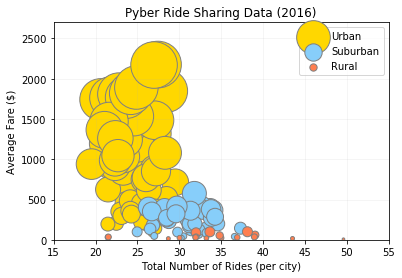

In [17]:
urban_plt = plt.scatter(avg_urban_fare, urban_driver_count,
                        color="gold", edgecolor="grey",
                        label="Urban", s=udc)


subu_plt = plt.scatter(avg_suburban_fare, suburban_driver_count,
                       color="lightskyblue", edgecolor="grey",
                       label="Suburban", s=sudc)

rural_plt = plt.scatter(avg_rural_fare, rural_driver_count,
                        color="coral", edgecolor="grey",
                        label="Rural", s=rdc)


plt.ylim(0, 2700)
plt.xlim(15, 55)

# Prints the scatter plot to the screen 

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="best")
plt.grid(alpha=.15)
plt.show()


In [85]:
# Save the plot and display it
plt.savefig("Pyber_ride_sharing2016.png")
plt.show()

In [18]:
# city type count 
city_type_count = city_type.value_counts()

In [19]:
# Total Drivers by City Type
total_drivers_per_city_type = pyber.groupby(["Type"]).sum()["Driver Count"]

In [20]:
# Total Fare ($) Per City
total_fare_per_city_type = pyber.groupby(["Type"]).sum()["Fare"]

In [21]:
# Total Number of Rides Per City_Type
total_rides_per_city_type = pyber.groupby(["Type"]).count()["Fare"]

In [22]:
# Chart for - % of Total Fares by City Type 

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [40078, 20335, 4255]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

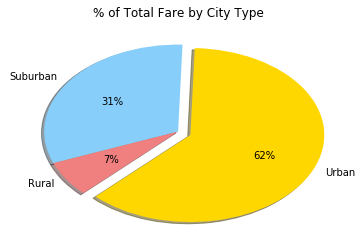

In [23]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.f%%', shadow=True, startangle=225)
plt.title("% of Total Fare by City Type")
plt.show()

In [24]:
# Chart for - % of Total Rides by City Type

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [1625, 657, 125]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

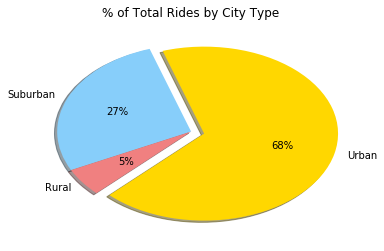

In [25]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.f%%', shadow=True, startangle=225)
plt.title("% of Total Rides by City Type")
plt.show()

In [26]:
# Chart for - % of Total Rides by City Type

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [64501, 9730, 727]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

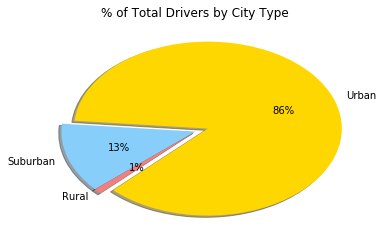

In [27]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.f%%', shadow=True, startangle=225)
plt.title("% of Total Drivers by City Type")
plt.show()